# Python for scientific computing
Python has extensive packages to help with data analysis:

* numpy: matrices, linear algebra, Fourier transform, pseudorandom number generators
* scipy: advanced linear algebra and maths, signal processing, statistics
* pandas: DataFrames, data wrangling and analysis
* matplotlib: visualizations such as line charts, histograms, scatter plots. 

In [94]:
# Global imports and settings
from preamble import *
%matplotlib inline
InteractiveShell.ast_node_interactivity = "all"
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:150%; line-height:1.2; overflow: visible;} .output_subarea pre{width:100%}</style>''') # For slides

## NumPy
NumPy is the fundamental package required for high performance scientific computing in Python. It provides:

* `ndarray`: fast and space-efficient n-dimensional numeric array with vectorized arithmetic operations
* Functions for fast operations on arrays without having to write loops
* Linear algebra, random number generation, Fourier transform
* Integrating code written in C, C++, and Fortran (for faster operations)

`pandas` provides a richer, simpler interface to many operations. We'll focus on using `ndarrays` here because they are heavily used in scikit-learn.

### ndarrays
There are several ways to create numpy arrays.

In [95]:
# Convert normal Python array to 1-dimensional numpy array
np.array((1, 2, 53))

array([ 1,  2, 53])

In [96]:
# Convert sequences of sequences of sequences ... to n-dim array
np.array([(1.5, 2, 3), (4, 5, 6)])

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

In [97]:
# Define element type at creation time
np.array([[1, 2], [3, 4]], dtype=complex)

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Useful properties of ndarrays:

In [98]:
my_array = np.array([[1, 0, 3], [0, 1, 2]])
my_array.ndim     # number of dimensions (axes), also called the rank
my_array.shape    # a matrix with n rows and m columns has shape (n,m)
my_array.size     # the total number of elements of the array
my_array.dtype    # type of the elements in the array
my_array.itemsize # the size in bytes of each element of the array

2

(2, 3)

6

dtype('int64')

8

Quick array creation.  
It is cheaper to create an array with placeholders than extending it later.

In [99]:
np.ones(3) # Default type is float64
np.zeros([2, 2]) 
np.empty([2, 2]) # Fills the array with whatever sits in memory
np.random.random((2,3))
np.random.randint(5, size=(2, 4))

array([1., 1., 1.])

array([[0., 0.],
       [0., 0.]])

array([[0., 0.],
       [0., 0.]])

array([[0.221, 0.861, 0.549],
       [0.778, 0.125, 0.538]])

array([[3, 1, 1, 1],
       [2, 0, 3, 3]])

Create sequences of numbers

In [100]:
np.linspace(0, 1, num=4)   # Linearly distributed numbers between 0 and 1
np.arange(0, 1, step=0.3)  # Fixed step size
np.arange(12).reshape(3,4) # Create and reshape
np.eye(4)                  # Identity matrix

array([0.   , 0.333, 0.667, 1.   ])

array([0. , 0.3, 0.6, 0.9])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### Basic Operations
Arithmetic operators on arrays apply elementwise. A new array is created and filled with the result. Some operations, such as += and *=, act in place to modify an existing array rather than create a new one.

In [101]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)
a, b    # Just printing
a-b
b**2
a > 32
a += 1
a

(array([20, 30, 40, 50]), array([0, 1, 2, 3]))

array([20, 29, 38, 47])

array([0, 1, 4, 9])

array([False, False,  True,  True])

array([21, 31, 41, 51])

The product operator * operates elementwise.  
The matrix product can be performed using dot() 

In [102]:
A, B = np.array([[1,1], [0,1]]), np.array([[2,0], [3,4]]) # assign multiple variables in one line
A
B
A * B
np.dot(A, B)

array([[1, 1],
       [0, 1]])

array([[2, 0],
       [3, 4]])

array([[2, 0],
       [0, 4]])

array([[5, 4],
       [3, 4]])

Upcasting: Operations with arrays of different types choose the more general/precise one.

In [103]:
a = np.ones(3, dtype=np.int) # initialize to integers
b = np.linspace(0, np.pi, 3) # default type is float
a.dtype, b.dtype, (a + b).dtype

(dtype('int64'), dtype('float64'), dtype('float64'))

ndarrays have most unary operations (max,min,sum,...) built in

In [104]:
a = np.random.random((2,3))
a
a.sum(), a.min(), a.max()

array([[0.057, 0.725, 0.083],
       [0.395, 0.017, 0.825]])

(2.1028801738915552, 0.016881707307918936, 0.8254116092022105)

By specifying the axis parameter you can apply an operation along a specified axis of an array

In [105]:
b = np.arange(12).reshape(3,4)
b
b.sum()
b.sum(axis=0) 
b.sum(axis=1) 

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

66

array([12, 15, 18, 21])

array([ 6, 22, 38])

### Universal Functions

NumPy provides familiar mathematical functions such as sin, cos, exp, sqrt, floor,... In NumPy, these are called "universal functions" (ufunc), and operate elementwise on an array, producing an array as output. 

In [106]:
np.sin(np.arange(0, 10))

array([ 0.   ,  0.841,  0.909,  0.141, -0.757, -0.959, -0.279,  0.657,
        0.989,  0.412])

### Shape Manipulation
Transpose, flatten, reshape,...

In [107]:
a = np.floor(10*np.random.random((3,4)))
a
a.transpose()
b = a.ravel() # flatten array
b
b.reshape(3, -1) # reshape in 3 rows (and as many columns as needed)

array([[6., 6., 8., 4.],
       [3., 5., 9., 4.],
       [2., 9., 2., 3.]])

array([[6., 3., 2.],
       [6., 5., 9.],
       [8., 9., 2.],
       [4., 4., 3.]])

array([6., 6., 8., 4., 3., 5., 9., 4., 2., 9., 2., 3.])

array([[6., 6., 8., 4.],
       [3., 5., 9., 4.],
       [2., 9., 2., 3.]])

Arrays can be split and stacked together

In [108]:
a = np.floor(10*np.random.random((2,6)))
a
b, c = np.hsplit(a, 2) # Idem: vsplit for vertical splits 
b
c
np.hstack((b, c)) # Idenm: vstack for vertical stacks

array([[7., 4., 2., 6., 8., 5.],
       [6., 1., 4., 3., 7., 1.]])

array([[7., 4., 2.],
       [6., 1., 4.]])

array([[6., 8., 5.],
       [3., 7., 1.]])

array([[7., 4., 2., 6., 8., 5.],
       [6., 1., 4., 3., 7., 1.]])

### Indexing and Slicing

Arrays can be indexed and sliced using [start:stop:stepsize]. Defaults are [0:ndim:1]

In [109]:
a = np.arange(10)**2
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [110]:
a[2]

4

In [111]:
a[3:10:2]

array([ 9, 25, 49, 81])

In [112]:
a[::-1] # Defaults are used if indices not stated

array([81, 64, 49, 36, 25, 16,  9,  4,  1,  0])

In [113]:
a[::2]

array([ 0,  4, 16, 36, 64])

For multi-dimensional arrays, axes are comma-separated: [x,y,z]. 

In [114]:
b = np.arange(16).reshape(4,4)
b
b[2,3] # row 2, column 3

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

11

In [115]:
b[0:3,1] # Values 0 to 3 in column 1 
b[ : ,1] # The whole column 1 

array([1, 5, 9])

array([ 1,  5,  9, 13])

In [116]:
b[1:3, : ] # Rows 1:3, all columns

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [117]:
# Return the last row
b[-1]   

array([12, 13, 14, 15])

Note: dots (...) represent as many colons (:) as needed
* x[1,2,...] = x[1,2,:,:,:]
* x[...,3] = x[:,:,:,:,3]
* x[4,...,5,:] = x[4,:,:,5,:]

Arrays can also be indexed by arrays of integers and booleans.

In [118]:
a = np.arange(12)**2         
i = np.array([ 1,1,3,8,5 ])
a
a[i]

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

array([ 1,  1,  9, 64, 25])

A matrix of indices returns a matrix with the corresponding values.

In [119]:
j = np.array([[ 3, 4], [9, 7]])
a[j]

array([[ 9, 16],
       [81, 49]])

With boolean indices we explicitly choose which items in the array we want and which ones we don't.

In [120]:
a = np.arange(12).reshape(3,4)
a
a[np.array([False,True,True]), :]
b = a > 4
b
a[b]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])

array([ 5,  6,  7,  8,  9, 10, 11])

### Iterating 
Iterating is done with respect to the first axis:

In [121]:
for row in b:
    print(row)

[False False False False]
[False  True  True  True]
[ True  True  True  True]


Operations on each element can be done by flattening the array (or nested loops)

In [122]:
for element in b.flat: # flat returns an iterator 
    print(element) 

False
False
False
False
False
True
True
True
True
True
True
True


### Copies and Views (or: how to shoot yourself in a foot)
Assigning an array to another variable does NOT create a copy

In [123]:
a = np.arange(12)
b = a
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [124]:
b[0] = -100
b

array([-100,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11])

In [125]:
a

array([-100,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11])

The view() method creates a NEW array object that looks at the same data. 

In [126]:
a = np.arange(12)
a
c = a.view()
c.resize((2, 6))
c

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [127]:
a[0] = 123
c # c is also changed now

array([[123,   1,   2,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11]])

Slicing an array returns a view of it.

In [128]:
c
s = c[ : , 1:3]  
s[:] = 10
s
c 

array([[123,   1,   2,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11]])

array([[10, 10],
       [10, 10]])

array([[123,  10,  10,   3,   4,   5],
       [  6,  10,  10,   9,  10,  11]])

The copy() method makes a deep copy of the array and its data. 

In [129]:
d = a.copy()      
d[0] = -42
d

array([-42,  10,  10,   3,   4,   5,   6,  10,  10,   9,  10,  11])

In [130]:
a

array([123,  10,  10,   3,   4,   5,   6,  10,  10,   9,  10,  11])

### Numpy: further reading

* Numpy Tutorial: http://wiki.scipy.org/Tentative_NumPy_Tutorial
* "Python for Data Analysis" by Wes McKinney (O'Reilly)

## SciPy
SciPy is a collection of packages for scientific computing, among others:

* scipy.integrate: numerical integration and differential equation solvers
* scipy.linalg: linear algebra routines and matrix decompositions
* scipy.optimize: function optimizers (minimizers) and root finding algorithms
* scipy.signal: signal processing tools
* scipy.sparse: sparse matrices and sparse linear system solvers
* scipy.stats: probability distributions, statistical tests, descriptive statistics

### Sparse matrices
Sparse matrices are used in scikit-learn for (large) arrays that contain mostly zeros. You can convert a dense (numpy) matrix to a sparse matrix.

In [131]:
from scipy import sparse
eye = np.eye(4)
eye
sparse_matrix = sparse.csr_matrix(eye) # Compressed Sparse Row matrix
sparse_matrix
print("{}".format(sparse_matrix))  

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


When the data is too large, you can create a sparse matrix by passing the values and coordinates (COO format).

In [132]:
data = np.ones(4)                         # [1,1,1,1]
row_indices = col_indices = np.arange(4)  # [0,1,2,3]
col_indices = np.arange(4) * 2
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("{}".format(eye_coo))

  (0, 0)	1.0
  (1, 2)	1.0
  (2, 4)	1.0
  (3, 6)	1.0


### Further reading
Check the [SciPy reference guide](https://docs.scipy.org/doc/scipy/reference/) for tutorials and examples of all SciPy capabilities.

## pandas
pandas is a Python library for data wrangling and analysis. It provides:

* ``DataFrame``: a table, similar to an R DataFrame that holds any structured data
    * Every column can have its own data type (strings, dates, floats,...)
* A great range of methods to apply to this table (sorting, querying, joining,...)
* Imports data from a wide range of data formats (CVS, Excel) and databases (e.g. SQL)

### Series
A one-dimensional array of data (of any numpy type), with indexed values. It can be created by passing a Python list or dict, a numpy array, a csv file,...

In [133]:
import pandas as pd
pd.Series([1,3,np.nan]) # Default integers are integers
pd.Series([1,3,5], index=['a','b','c'])
pd.Series({'a' : 1, 'b': 2, 'c': 3 }) # when given a dict, the keys will be used for the index
pd.Series({'a' : 1, 'b': 2, 'c': 3 }, index = ['b', 'c', 'd']) # this will try to match labels with keys

0    1.0
1    3.0
2    NaN
dtype: float64

a    1
b    3
c    5
dtype: int64

a    1
b    2
c    3
dtype: int64

b    2.0
c    3.0
d    NaN
dtype: float64

Functions like a numpy array, however with index labels as indices

In [134]:
a = pd.Series({'a' : 1, 'b': 2, 'c': 3 })
a
a['b']       # Retrieves a value
a[['a','b']] # and can also be sliced

a    1
b    2
c    3
dtype: int64

2

a    1
b    2
dtype: int64

numpy array operations on Series preserve the index value

In [135]:
a
a[a > 1]
a * 2 
np.sqrt(a)

a    1
b    2
c    3
dtype: int64

b    2
c    3
dtype: int64

a    2
b    4
c    6
dtype: int64

a    1.00
b    1.41
c    1.73
dtype: float64

Operations over multiple Series will align the indices

In [136]:
a = pd.Series({'John' : 1000, 'Mary': 2000, 'Andre': 3000 })
b = pd.Series({'John' : 100, 'Andre': 200, 'Cecilia': 300 })
a + b

Andre      3200.0
Cecilia       NaN
John       1100.0
Mary          NaN
dtype: float64

### DataFrame
A DataFrame is a tabular data structure with both a row and a column index. It can be created by passing a dict of arrays, a csv file,...

In [137]:
data = {'state': ['Ohio', 'Ohio', 'Nevada', 'Nevada'], 'year': [2000, 2001, 2001, 2002],
'pop': [1.5, 1.7, 2.4, 2.9]}
pd.DataFrame(data)
pd.DataFrame(data, columns=['year', 'state', 'pop', 'color']) # Will match indices  

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,2.4,Nevada,2001
3,2.9,Nevada,2002


,year,state,pop,color
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2001,Nevada,2.4,NaN
3,2002,Nevada,2.9,NaN


It can be composed with a numpy array and row and column indices, and decomposed

In [138]:
dates = pd.date_range('20130101',periods=4)
df = pd.DataFrame(np.random.randn(4,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.53,0.74,-0.03,-1.84
2013-01-02,-0.62,-1.15,0.34,0.60
2013-01-03,-0.98,-0.66,-1.93,0.87
2013-01-04,-2.14,-0.31,-1.48,1.40


In [139]:
df.index
df.columns
df.values

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04'], dtype='datetime64[ns]', freq='D')

Index(['A', 'B', 'C', 'D'], dtype='object')

array([[ 1.528,  0.744, -0.035, -1.843],
       [-0.623, -1.15 ,  0.345,  0.599],
       [-0.984, -0.661, -1.932,  0.87 ],
       [-2.142, -0.306, -1.477,  1.399]])

DataFrames can easily read/write data from/to files

* `read_csv(source)`: load CSV data from file or url
* `read_table(source, sep=',')`: load delimited data with separator
* `df.to_csv(target)`: writes the DataFrame to a file

In [140]:
df.to_csv('data.csv', index=False) # Don't export the row index
dfs = pd.read_csv('data.csv')
dfs
dfs.set_value(0, 'A', 10) # Set value in row 0, column 'A' to '10'
dfs.to_csv('data.csv', index=False) 

,A,B,C,D
0,1.53,0.74,-0.03,-1.84
1,-0.62,-1.15,0.34,0.60
2,-0.98,-0.66,-1.93,0.87
3,-2.14,-0.31,-1.48,1.40


,A,B,C,D
0,10.00,0.74,-0.03,-1.84
1,-0.62,-1.15,0.34,0.60
2,-0.98,-0.66,-1.93,0.87
3,-2.14,-0.31,-1.48,1.40


### Simple operations

In [141]:
df.head() # First 5 rows
df.tail() # Last 5 rows

,A,B,C,D
2013-01-01,1.53,0.74,-0.03,-1.84
2013-01-02,-0.62,-1.15,0.34,0.60
2013-01-03,-0.98,-0.66,-1.93,0.87
2013-01-04,-2.14,-0.31,-1.48,1.40


,A,B,C,D
2013-01-01,1.53,0.74,-0.03,-1.84
2013-01-02,-0.62,-1.15,0.34,0.60
2013-01-03,-0.98,-0.66,-1.93,0.87
2013-01-04,-2.14,-0.31,-1.48,1.40


In [142]:
# Quick stats
df.describe()

,A,B,C,D
count,4.00,4.00,4.00,4.00
mean,-0.56,-0.34,-0.77,0.26
std,1.53,0.80,1.10,1.44
min,-2.14,-1.15,-1.93,-1.84
25%,-1.27,-0.78,-1.59,-0.01
50%,-0.80,-0.48,-0.76,0.73
75%,-0.08,-0.04,0.06,1.00
max,1.53,0.74,0.34,1.40


In [143]:
# Transpose
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00
A,1.53,-0.62,-0.98,-2.14
B,0.74,-1.15,-0.66,-0.31
C,-0.03,0.34,-1.93,-1.48
D,-1.84,0.60,0.87,1.40


In [144]:
df.sort_index(axis=1, ascending=False) # Sort by index labels
df.sort(columns='B') # Sort by values

,D,C,B,A
2013-01-01,-1.84,-0.03,0.74,1.53
2013-01-02,0.60,0.34,-1.15,-0.62
2013-01-03,0.87,-1.93,-0.66,-0.98
2013-01-04,1.40,-1.48,-0.31,-2.14


,A,B,C,D
2013-01-02,-0.62,-1.15,0.34,0.60
2013-01-03,-0.98,-0.66,-1.93,0.87
2013-01-04,-2.14,-0.31,-1.48,1.40
2013-01-01,1.53,0.74,-0.03,-1.84


### Selecting and slicing

In [145]:
df['A'] # Get single column by label
df.A    # Shorthand 

2013-01-01    1.53
2013-01-02   -0.62
2013-01-03   -0.98
2013-01-04   -2.14
Freq: D, Name: A, dtype: float64

2013-01-01    1.53
2013-01-02   -0.62
2013-01-03   -0.98
2013-01-04   -2.14
Freq: D, Name: A, dtype: float64

In [146]:
df[0:2]          # Get rows by index number
df.iloc[0:2,0:2] # Get rows and columns by index number
df['20130102':'20130103']                # or row label  
df.loc['20130102':'20130103', ['A','B']] # or row and column label
df.ix[0:2, ['A','B']]   # allows mixing integers and labels

,A,B,C,D
2013-01-01,1.53,0.74,-0.03,-1.84
2013-01-02,-0.62,-1.15,0.34,0.60


,A,B
2013-01-01,1.53,0.74
2013-01-02,-0.62,-1.15


,A,B,C,D
2013-01-02,-0.62,-1.15,0.34,0.60
2013-01-03,-0.98,-0.66,-1.93,0.87


,A,B
2013-01-02,-0.62,-1.15
2013-01-03,-0.98,-0.66


,A,B
2013-01-01,1.53,0.74
2013-01-02,-0.62,-1.15


query() retrieves data matching a boolean expression

In [147]:
df
df.query('A > -0.4') # Identical to df[df.A > 0.4]
df.query('A > B')   # Identical to df[df.A > df.B]

,A,B,C,D
2013-01-01,1.53,0.74,-0.03,-1.84
2013-01-02,-0.62,-1.15,0.34,0.60
2013-01-03,-0.98,-0.66,-1.93,0.87
2013-01-04,-2.14,-0.31,-1.48,1.40


,A,B,C,D
2013-01-01,1.53,0.74,-0.03,-1.84


,A,B,C,D
2013-01-01,1.53,0.74,-0.03,-1.84
2013-01-02,-0.62,-1.15,0.34,0.60


Note: similar to NumPy, indexing and slicing returns a _view_ on the data. Use copy() to make a deep copy.

### Operations
DataFrames offer a [wide range of operations](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html): max, mean, min, sum, std,... 

In [148]:
df.mean()       # Mean of all values per column
df.mean(axis=1) # Other axis: means per row

A   -0.56
B   -0.34
C   -0.77
D    0.26
dtype: float64

2013-01-01    0.10
2013-01-02   -0.21
2013-01-03   -0.68
2013-01-04   -0.63
Freq: D, dtype: float64

All of numpy's universal functions also work with dataframes

In [149]:
np.abs(df)

,A,B,C,D
2013-01-01,1.53,0.74,0.03,1.84
2013-01-02,0.62,1.15,0.34,0.60
2013-01-03,0.98,0.66,1.93,0.87
2013-01-04,2.14,0.31,1.48,1.40


Other (custom) functions can be applied with apply(funct)

In [150]:
df
df.apply(np.max)
df.apply(lambda x: x.max() - x.min())

,A,B,C,D
2013-01-01,1.53,0.74,-0.03,-1.84
2013-01-02,-0.62,-1.15,0.34,0.60
2013-01-03,-0.98,-0.66,-1.93,0.87
2013-01-04,-2.14,-0.31,-1.48,1.40


A    1.53
B    0.74
C    0.34
D    1.40
dtype: float64

A    3.67
B    1.89
C    2.28
D    3.24
dtype: float64

Data can be aggregated with groupby()

In [151]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar'], 'B' : ['one', 'one', 'two', 'three'],
                   'C' : np.random.randn(4), 'D' : np.random.randn(4)})
df
df.groupby('A').sum()
df.groupby(['A','B']).sum()

,A,B,C,D
0,foo,one,0.74,-0.29
1,bar,one,0.73,-0.17
2,foo,two,-1.12,1.04
3,bar,three,-1.66,-0.19


,C,D
A,,
bar,-0.93,-0.36
foo,-0.38,0.74


C     D
A   B                
bar one    0.73 -0.17
    three -1.66 -0.19
foo one    0.74 -0.29
    two   -1.12  1.04

### Data wrangling (some examples)
Merge: combine two dataframes based on common keys

In [152]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a'], 'data1': range(3)}) 
df2 = pd.DataFrame({'key': ['a', 'b'], 'data2': range(2)})
df1
df2
pd.merge(df1, df2)

,data1,key
0,0,b
1,1,b
2,2,a


,data2,key
0,0,a
1,1,b


,data1,key,data2
0,0,b,1
1,1,b,1
2,2,a,0


Append: append one dataframe to another

In [153]:
df = pd.DataFrame(np.random.randn(2, 4))
df
s = pd.DataFrame(np.random.randn(1,4))
s
df.append(s, ignore_index=True)

,0,1,2,3
0,-0.01,1.95,0.17,1.27
1,-0.38,-0.12,-0.45,-1.21


,0,1,2,3
0,0.05,-0.34,-0.73,0.38


,0,1,2,3
0,-0.01,1.95,0.17,1.27
1,-0.38,-0.12,-0.45,-1.21
2,0.05,-0.34,-0.73,0.38


Remove duplicates

In [154]:
df = pd.DataFrame({'k1': ['one'] * 3, 'k2': [1, 1, 2]})
df
df.drop_duplicates()

,k1,k2
0,one,1
1,one,1
2,one,2


,k1,k2
0,one,1
2,one,2


Replace values

In [155]:
df = pd.DataFrame({'k1': [1, -1], 'k2': [-1, 2]}) # Say that -1 is a sentinel for missing data
df
df.replace(-1, np.nan)

,k1,k2
0,1,-1
1,-1,2


,k1,k2
0,1.0,NaN
1,NaN,2.0


Discretization and binning

In [156]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats.labels
pd.value_counts(cats)

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

### Further reading

* Pandas docs: http://pandas.pydata.org/pandas-docs/stable/
* https://bitbucket.org/hrojas/learn-pandas
* Python for Data Analysis (O'Reilly) by Wes McKinney (the author of pandas)          

## matplotlib
[matplotlib](http://matplotlib.sourceforge.net) is the primary scientific plotting library in Python. It provides:

* Publication-quality [visualizations](http://matplotlib.org/gallery.html) such as line charts, histograms, and scatter plots.
* Integration in pandas to make plotting much easier.
* Interactive plotting in Jupyter notebooks for quick visualizations.
    * Requires some setup. See preamble and [%matplotlib](http://ipython.readthedocs.io/en/stable/interactive/plotting.html?highlight=matplotlib).
* Many GUI backends, export to PDF, SVG, JPG, PNG, BMP, GIF, etc.
* Ecosystem of libraries for more advanced plotting, e.g. [Seaborn](http://seaborn.pydata.org/)

### Low-level usage
`plot()` is the [main function](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) to generate a plot (but many more exist):
```
plot(x, y)        Plot x vs y, default settings
plot(x, y, 'bo')  Plot x vs y, blue circle markers
plot(y, 'r+')     Plot y (x = array 0..N-1), red plusses
```

Every plotting function is completely customizable through a large set of options.

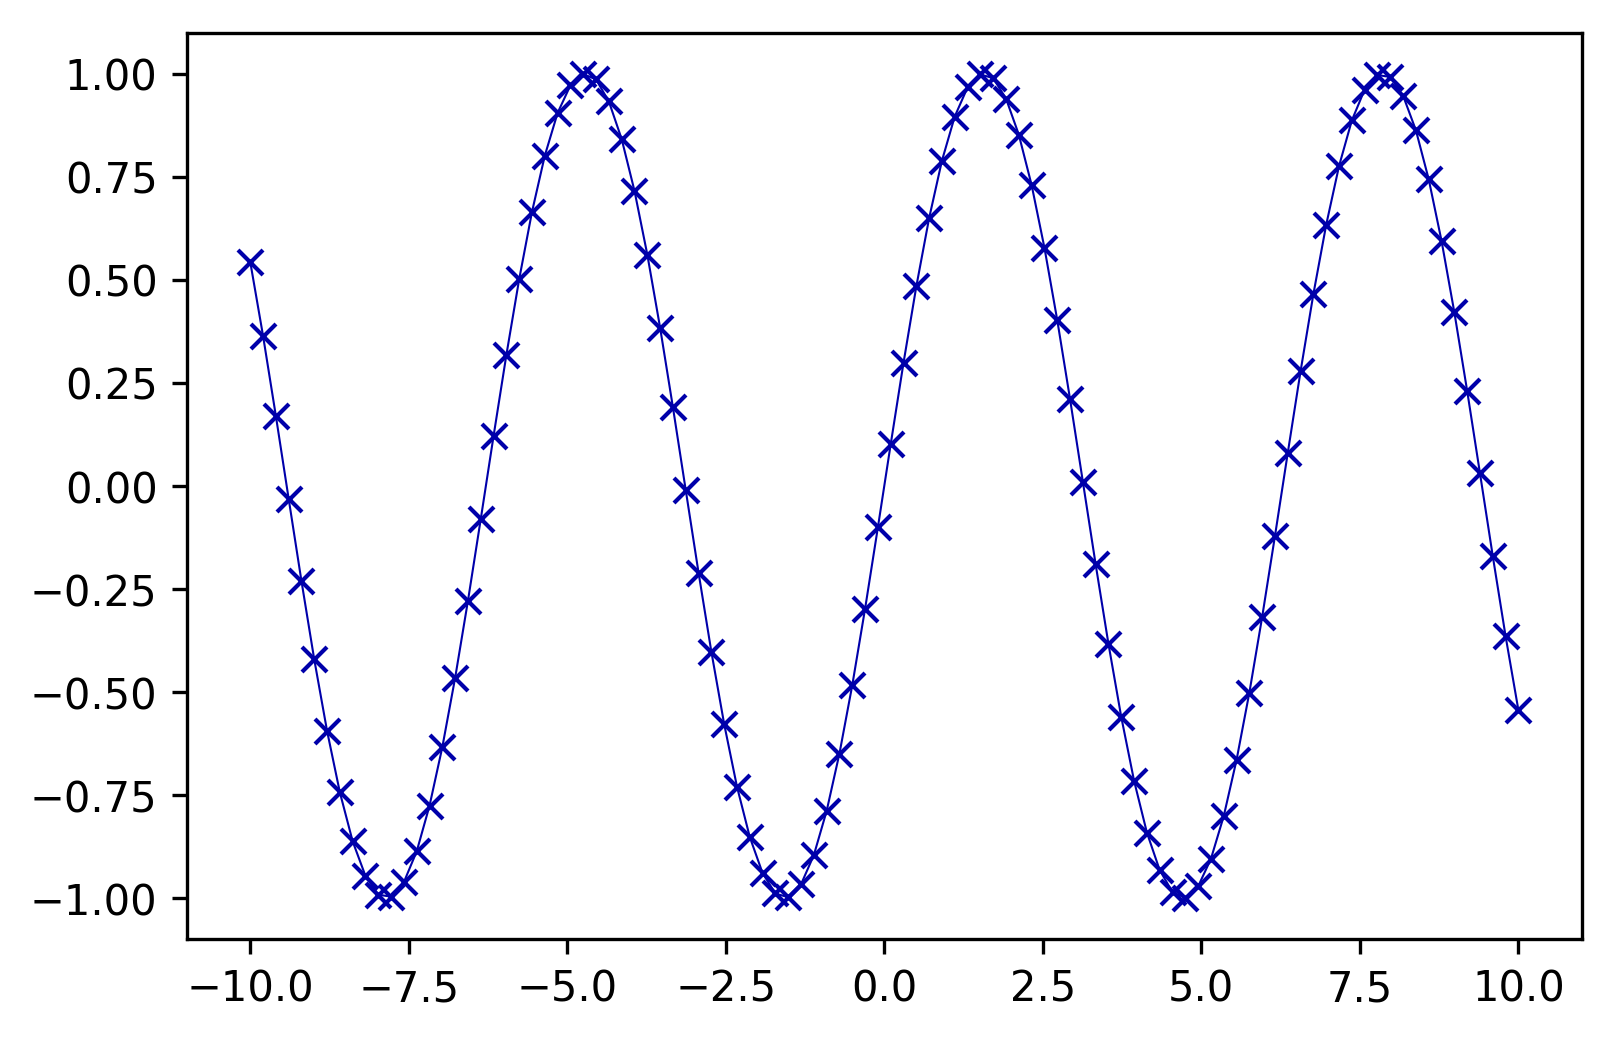

In [157]:
x = np.linspace(-10, 10, 100) # Sequence for X-axis 
y = np.sin(x) # sine values 
p = plt.plot(x, y, marker="x") # Line plot with marker x

### pandas + matplotlib
pandas DataFrames offer an easier, higher-level interface for matplotlib functions

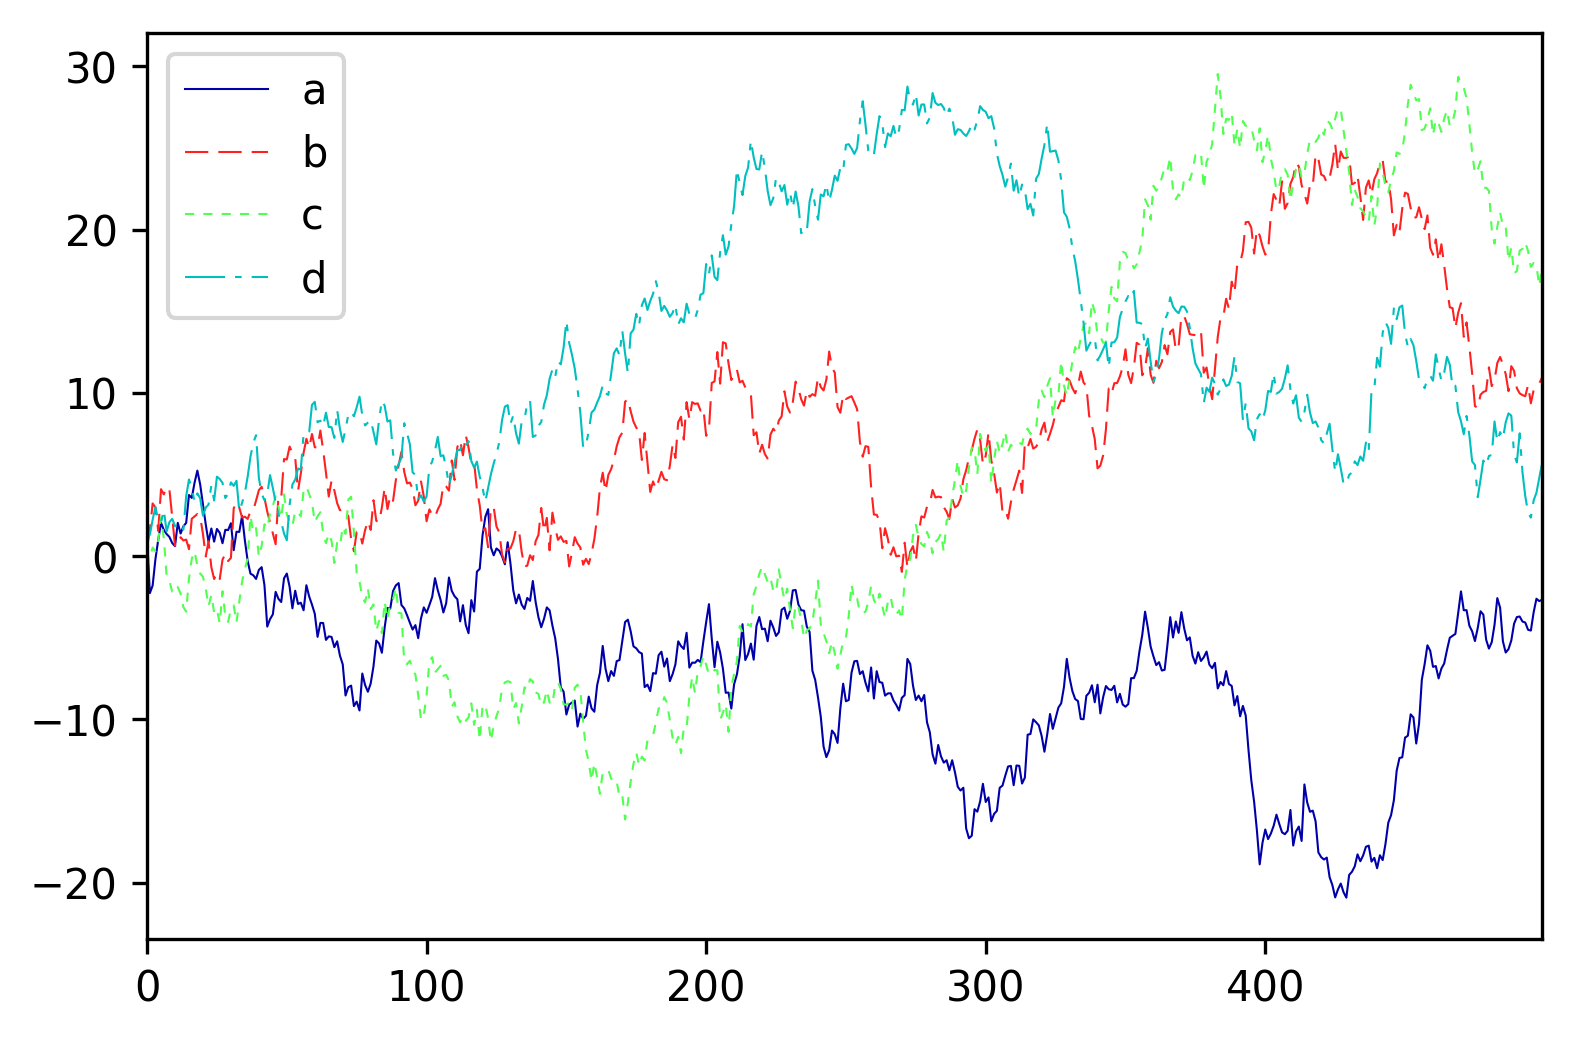

In [158]:
df = pd.DataFrame(np.random.randn(500, 4), 
                  columns=['a', 'b', 'c', 'd']) # random 4D data
p = df.cumsum() # Plot cumulative sum of all series
p.plot()

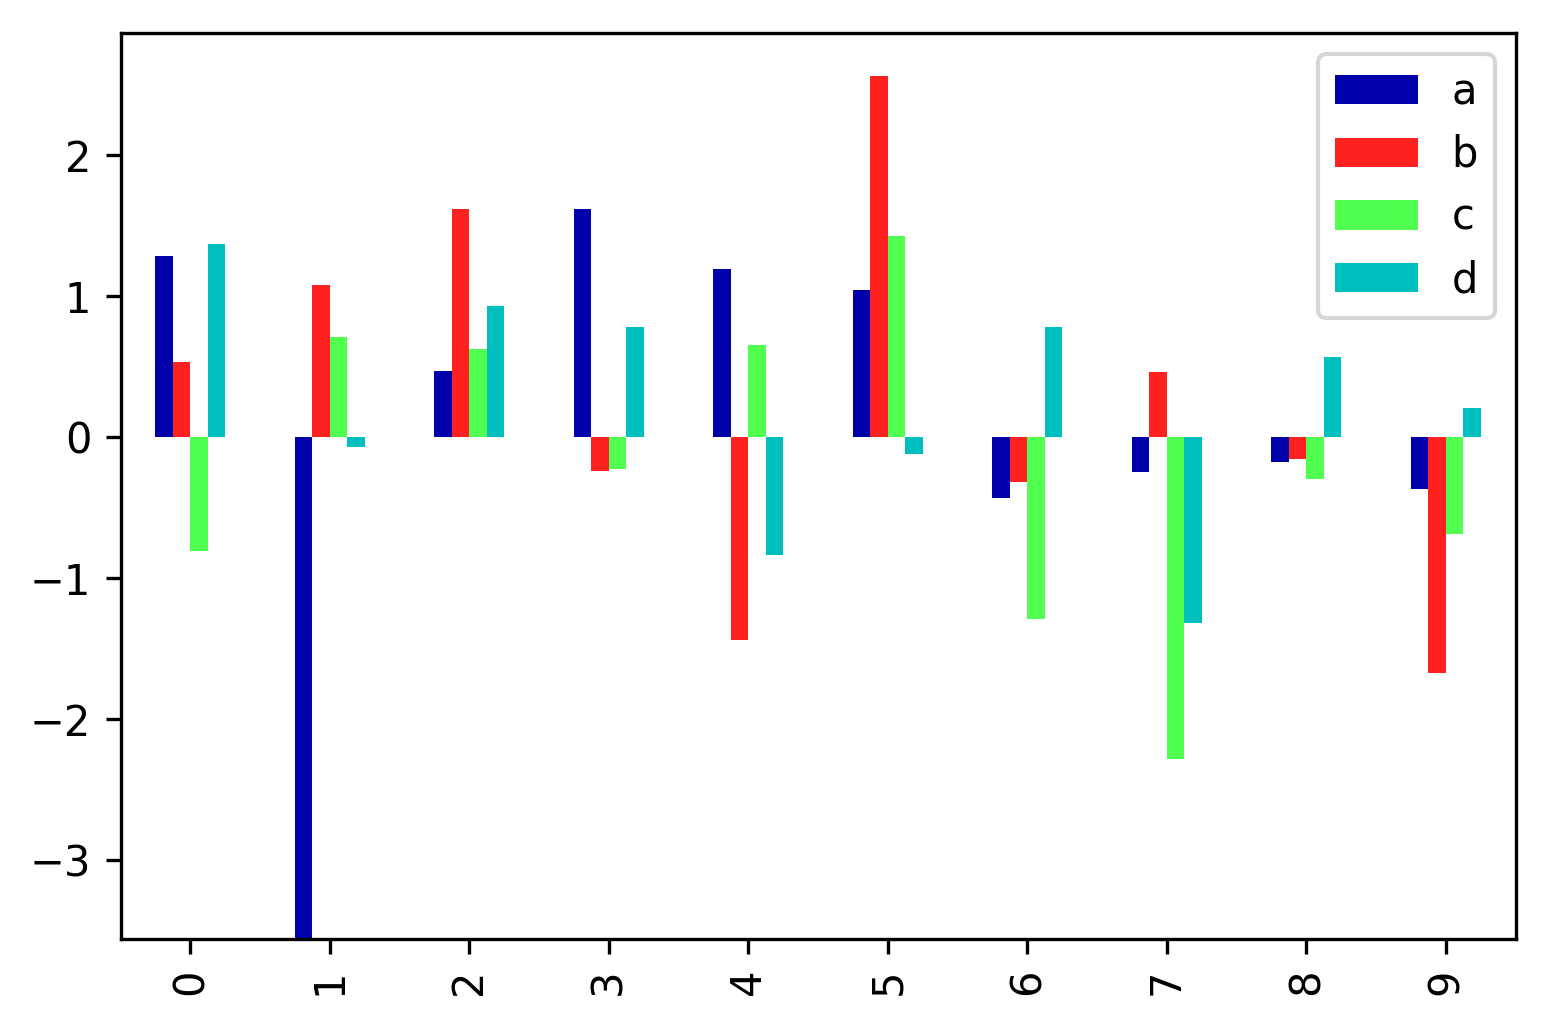

In [159]:
p = df[:10].plot(kind='bar') # First 10 arrays as bar plots  

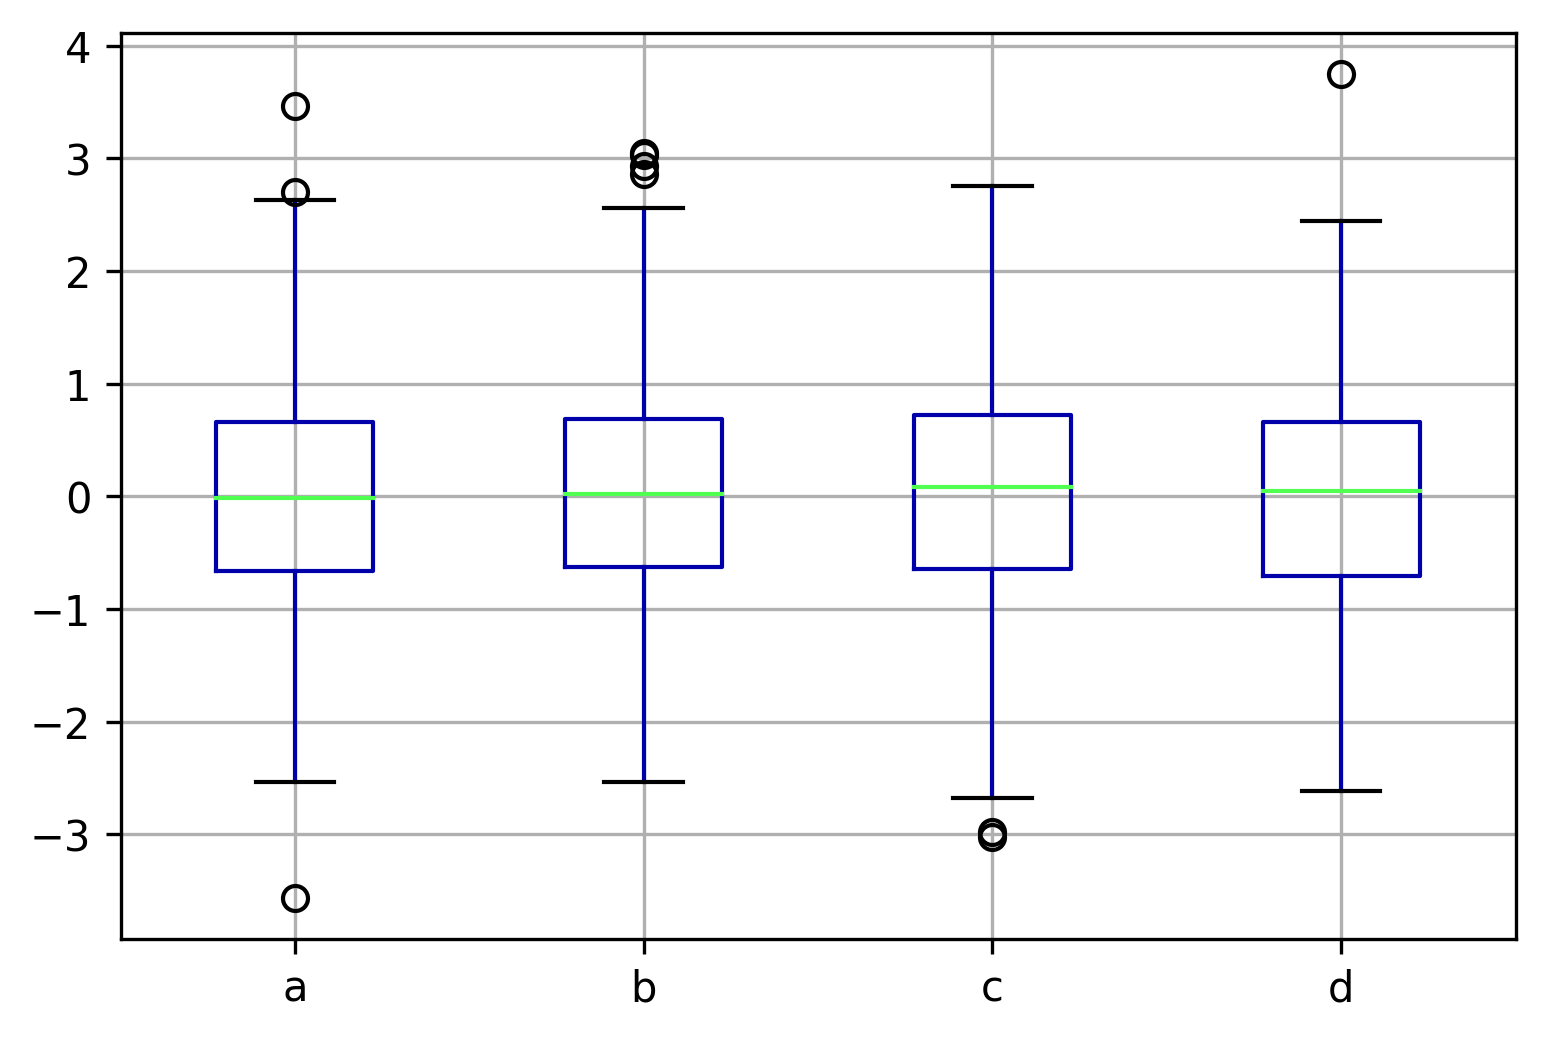

In [160]:
p = df.boxplot() # Boxplot for each of the 4 series

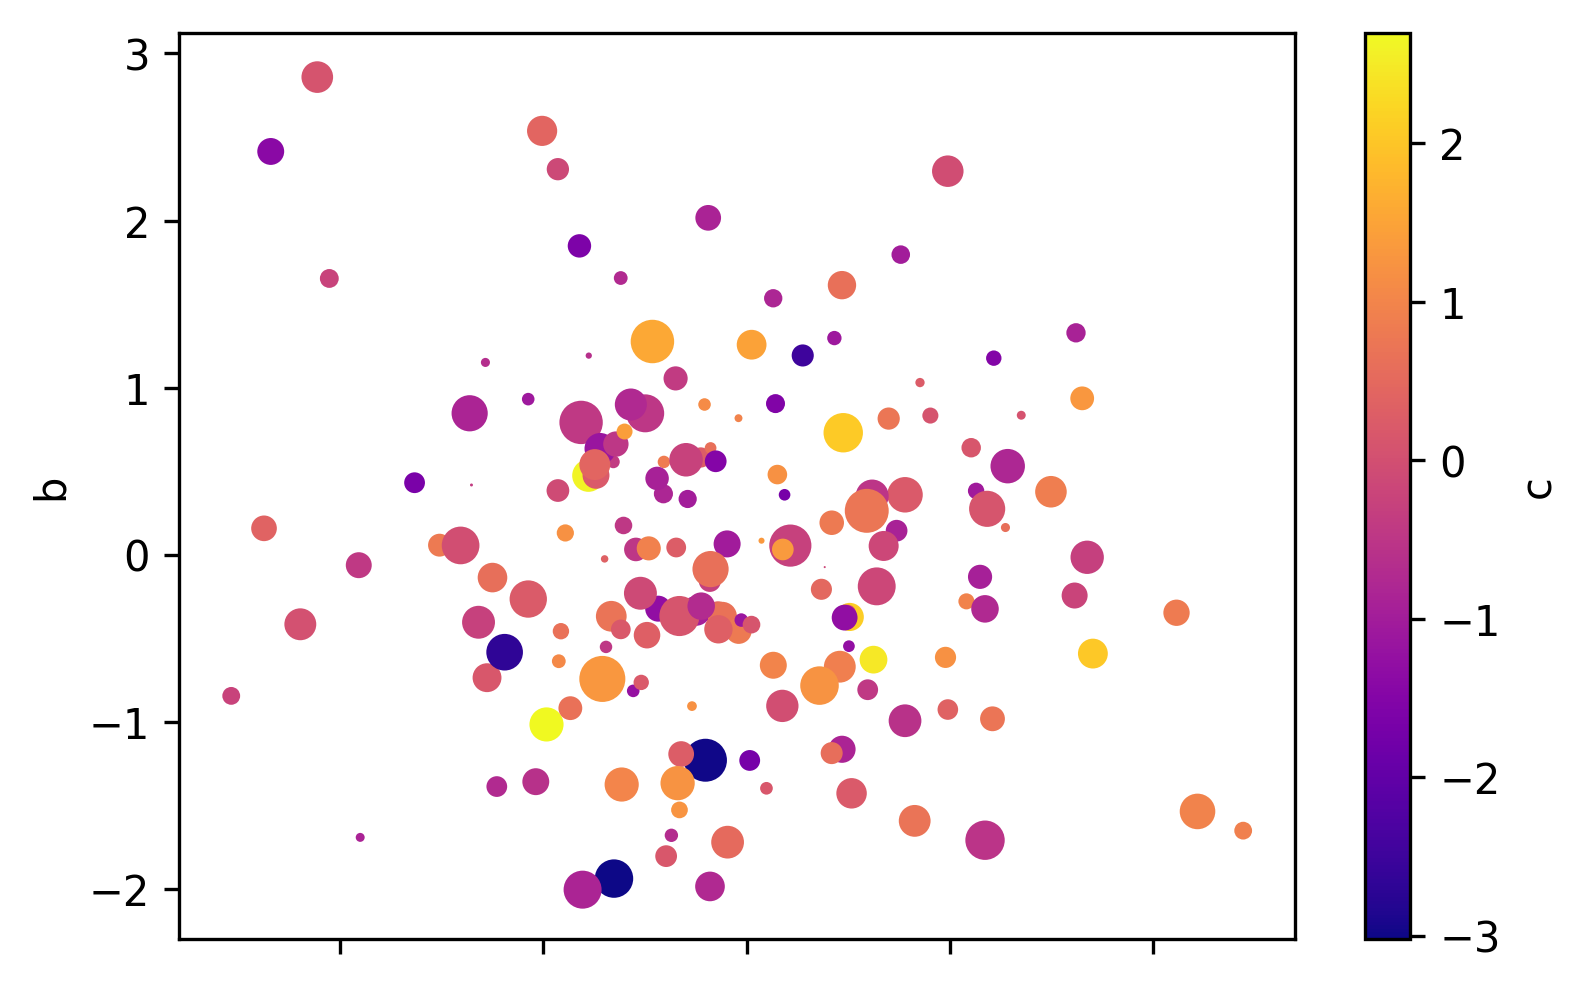

In [161]:
# Scatter plot using the 4 series for x, y, color, scale 
df[:300].plot(kind='scatter', x='a', y='b', c='c', 
               s=df['d']*50, linewidth='0', cmap='plasma')

### Advanced plotting libraries
Several libraries, such as [Seaborn](http://seaborn.pydata.org/examples/index.html) offer more advanced plots and easier interfaces. 
![Seaborn Examples](http://ksopyla.com/wp-content/uploads/2016/11/seaborn_examples.jpg)

### Further reading links

* [Matplotlib examples](http://matplotlib.org/gallery.html)
* [Plotting with pandas](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html)
* [Seaborn examples](http://seaborn.pydata.org/examples/index.html)